In [5]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
import statsmodels.api as sm
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score

In [6]:
#read data
data=pd.read_csv("bank-full.csv",sep=";")

In [7]:
data.info() #data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [9]:
summary_num = data.describe() #summary of numerics
summary_num

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
#variables
variables = set(data.columns)
numerics = set(summary_num.columns)
categoricals = variables - numerics - set("y")
print("categoricals :", categoricals)
print("numerics     :", numerics)

categoricals : {'poutcome', 'job', 'marital', 'contact', 'default', 'housing', 'loan', 'education', 'month'}
numerics     : {'duration', 'age', 'day', 'pdays', 'campaign', 'previous', 'balance'}


may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


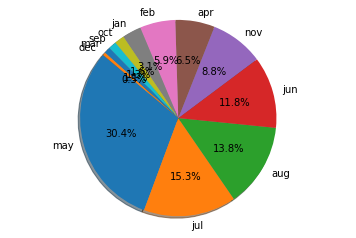

yes    25130
no     20081
Name: housing, dtype: int64


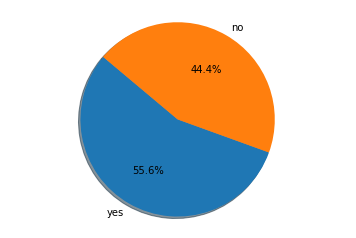

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


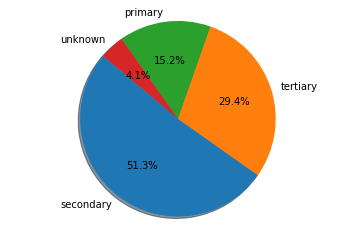

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


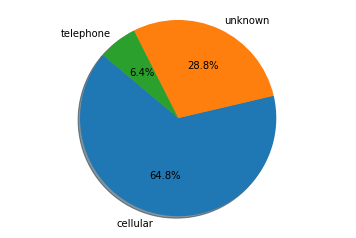

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


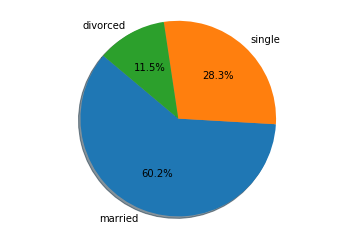

no     37967
yes     7244
Name: loan, dtype: int64


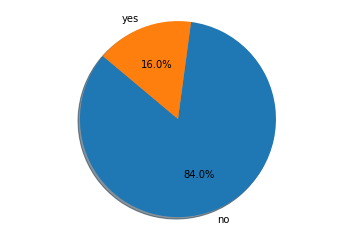

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


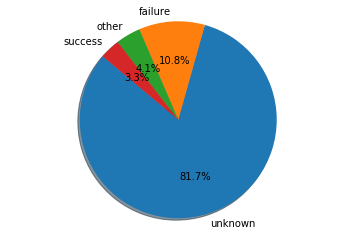

no     44396
yes      815
Name: default, dtype: int64


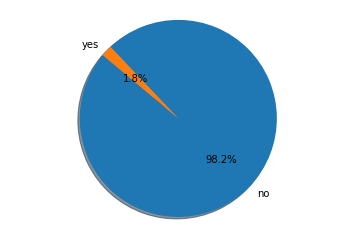

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


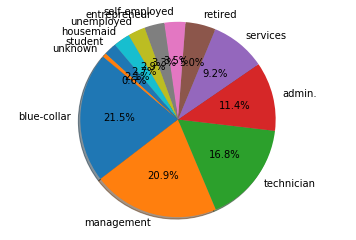

In [7]:
#percentage of 'unknown's
for col in list(categoricals):
    na_check = data[col].value_counts()
    #na_check = na_check/sum(na_check)
    print(na_check)
    
    labels = list(na_check.index)
    sizes = list(na_check)
    #colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
    #explode = (0.1, 0, 0, 0)  # explode 1st slice

    plt.pie(sizes, labels=labels,
    autopct='%1.1f%%', shadow=True, startangle=140)

    plt.axis('equal')
    plt.show()

In [11]:
#replace unknown values to NA
data.replace('unknown', np.nan, inplace=True)

In [12]:
#add new columns called month_num
#month to numbers
data['month_num'] = data.month.map({"jan" : 1, "feb" : 2, "mar" : 3, "apr" : 4, "may" : 5, "jun" : 6, "jul" : 7, "aug" : 8, "sep" : 9, "oct" : 10, "nov" : 11, "dec" : 12})

In [13]:
#convert -1 to 10000 in pdays
data.pdays.replace(-1,10000 , inplace=True)

In [14]:
#convert "yes" "no" to 1 and 0
data.y.replace('yes', 1, inplace=True)
data.y.replace('no', 0, inplace=True)

0    39922
1     5289
Name: y, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

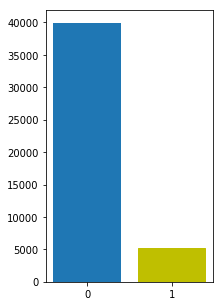

In [15]:
#check whole data whether to be imbalanced
print(data.y.value_counts())
labs = list(data.y.value_counts().index)
vals = list(data.y.value_counts())
plt.figure(figsize = (3,5))
bar = plt.bar(np.arange(len(labs)), vals)
bar[1].set_color("y")
plt.xticks(np.arange(len(labs)), labs)
plt.show

In [16]:
#split data
train, test = train_test_split(data, test_size=0.3,random_state=1)

In [17]:
#handle NAs
print("for train dataset\n",train.isna().sum()[train.isna().sum()>0], "\n", sep="") 
train = train.apply(lambda x:x.fillna(x.value_counts().index[0]))
print("for test dataset\n",test.isna().sum()[test.isna().sum()>0], "\n", sep="")
data = data.apply(lambda x:x.fillna(x.value_counts().index[0]))
train_to_delete, test = train_test_split(data, test_size=0.3,random_state=1)

for train dataset
job            194
education     1273
contact       9043
poutcome     25901
dtype: int64

for test dataset
job             94
education      584
contact       3977
poutcome     11058
dtype: int64



In [18]:
#oversampling the train data
print("before\n",train.y.value_counts(), "\n", sep = "")
max_size = train['y'].value_counts().max()
lst = [train]
for class_index, group in train.groupby('y'):
    lst.append(group.sample(max_size-len(group), replace=True))
train = pd.concat(lst)
print("after\n",train.y.value_counts(), sep ="")

before
0    27909
1     3738
Name: y, dtype: int64

after
1    27909
0    27909
Name: y, dtype: int64


In [19]:
#oversampling the test data
print("before\n",test.y.value_counts(),"\n", sep="")
max_size = test['y'].value_counts().max()
lst = [test]
for class_index, group in test.groupby('y'):
    lst.append(group.sample(max_size-len(group), replace=True))
test = pd.concat(lst)
print("after\n",test.y.value_counts(), sep ="")

before
0    12013
1     1551
Name: y, dtype: int64

after
1    12013
0    12013
Name: y, dtype: int64


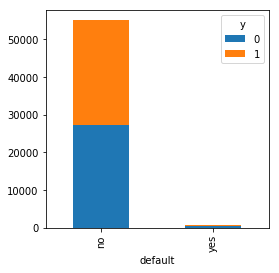

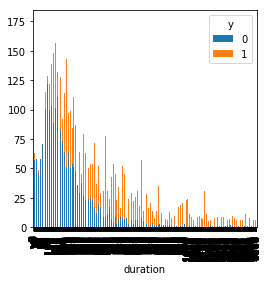

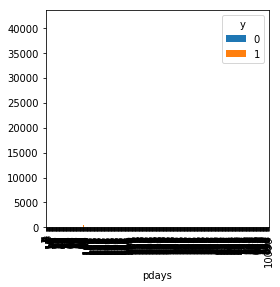

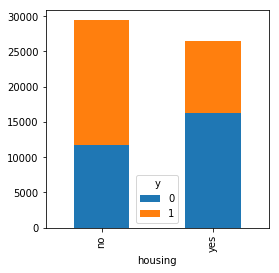

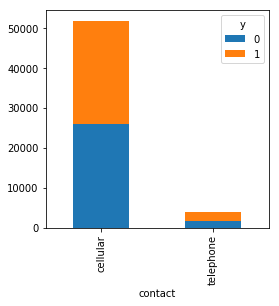

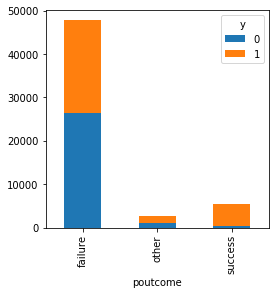

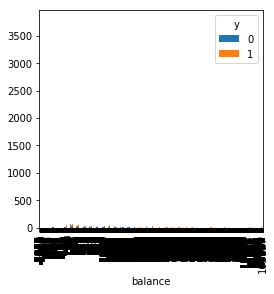

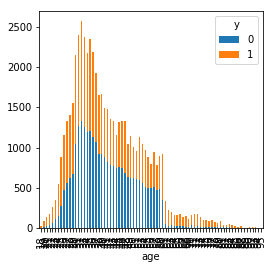

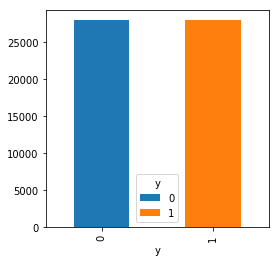

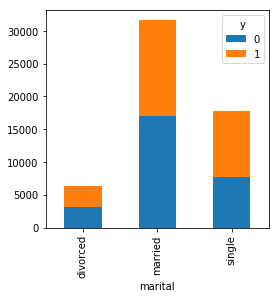

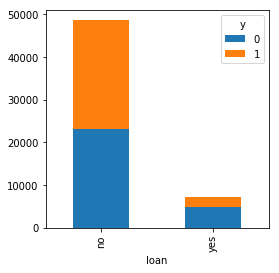

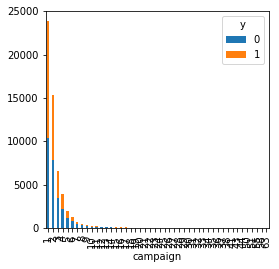

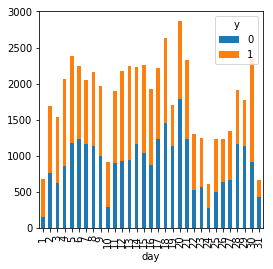

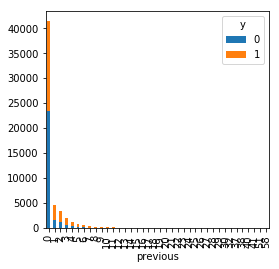

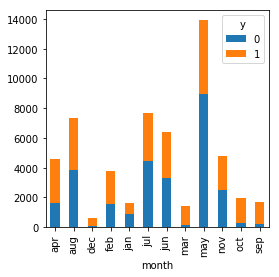

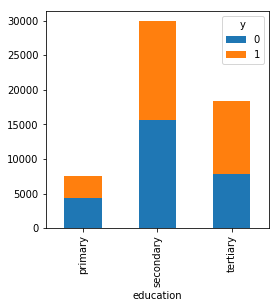

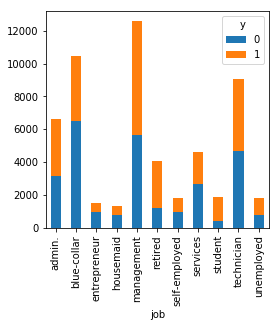

In [18]:
#frequency-based
for col in list(variables):
    stacked = pd.crosstab(index=train[col], columns=train["y"])
    
    stacked.plot(kind="bar", figsize=(4,4), stacked=True)

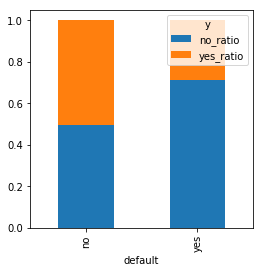

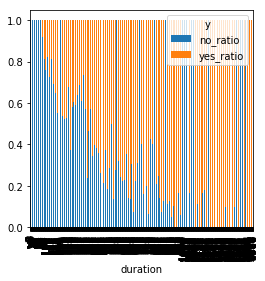

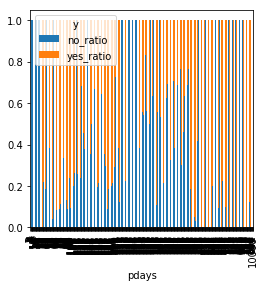

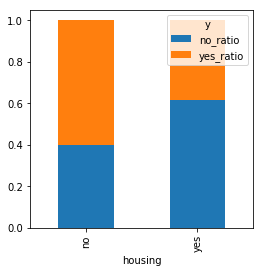

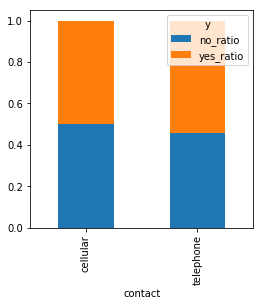

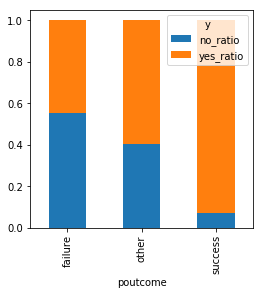

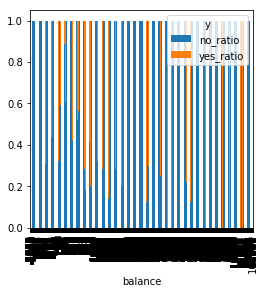

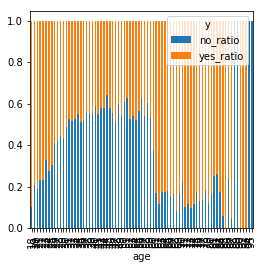

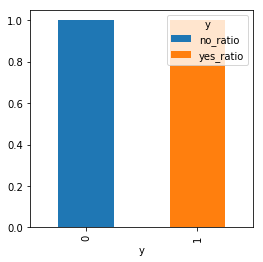

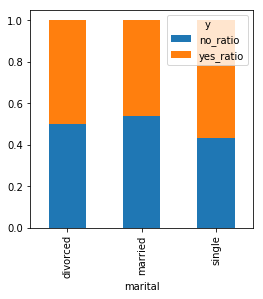

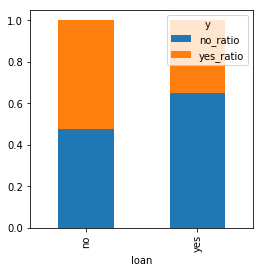

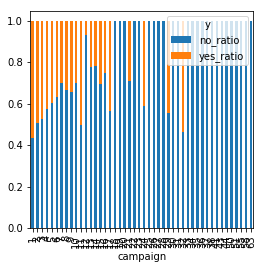

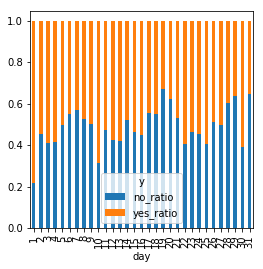

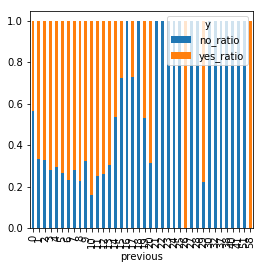

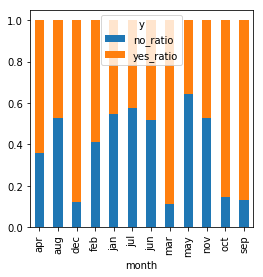

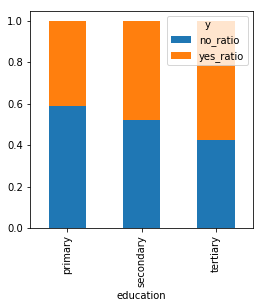

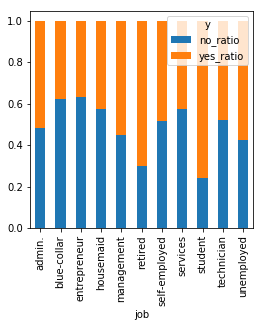

In [19]:
#ratio-based (normalized)
for col in list(variables):
    stacked = pd.crosstab(index=train[col], columns=train["y"])

    stacked["no_ratio"] = stacked[0]/(stacked[0] + stacked[1])
    stacked["yes_ratio"] = stacked[1]/(stacked[0] + stacked[1])

    stacked_ratio = stacked.loc[:,"no_ratio":"yes_ratio"]

    stacked_ratio.plot(kind="bar", figsize=(4,4), stacked=True)

*****************
 duration


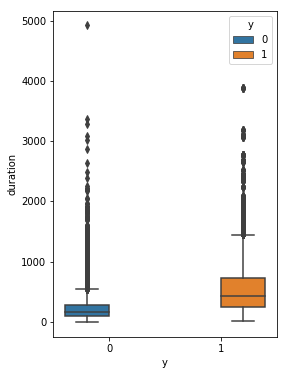

*****************
 pdays


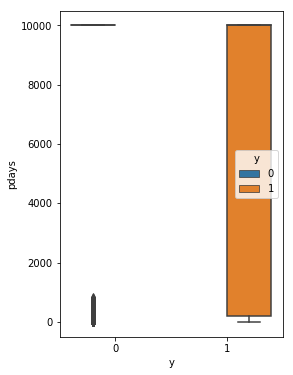

*****************
 balance


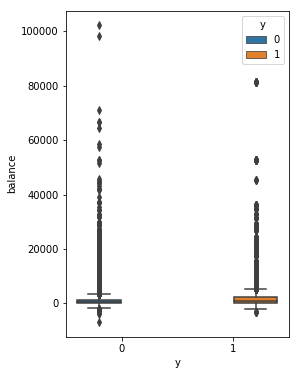

*****************
 age


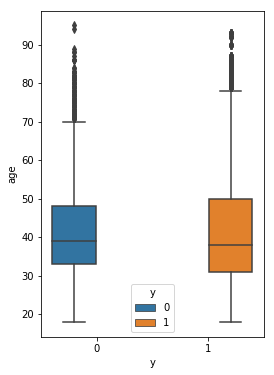

*****************
 campaign


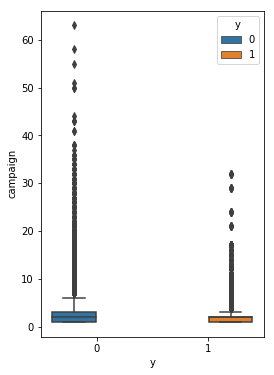

*****************
 day


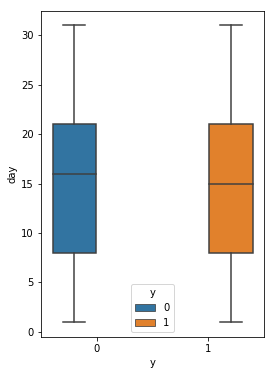

*****************
 previous


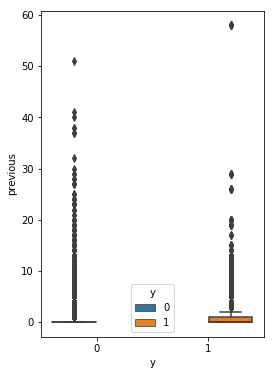

In [22]:
for col in list(numerics):
    plt.figure(figsize = (4,6))
    print("*****************\n", col)
    sns.boxplot(x="y",y=train[col],hue="y",data=train)
    plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

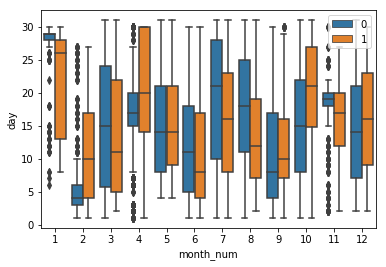

In [23]:
sns.boxplot(x="month_num",y="day",hue="y",data=train)
plt.legend(loc='upper right')
plt.show

In [20]:
#make categorical columns boolean
data=pd.get_dummies(data=data)
train=pd.get_dummies(data=train)
test=pd.get_dummies(data=test)

In [21]:
#scale data
scaler = MinMaxScaler()
train = scaler.fit_transform(train)
test= scaler.transform(test)
train = pd.DataFrame(train, columns = data.columns)
test = pd.DataFrame(test, columns = data.columns)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


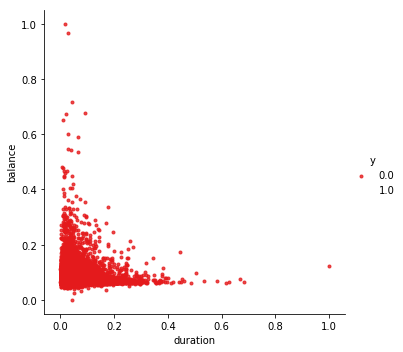

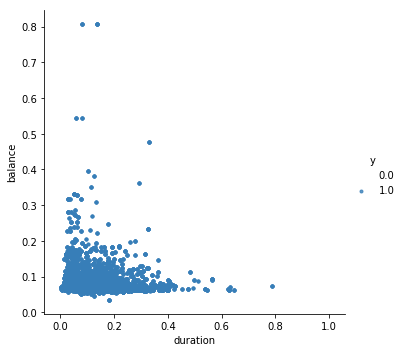

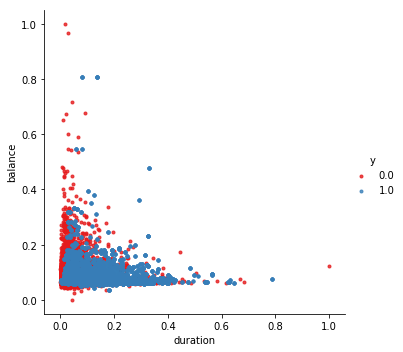

In [19]:
sns.lmplot(y="balance", x="duration", hue="y", data=train, palette='Set1', fit_reg=False, markers=[".",""])
sns.lmplot(y="balance", x="duration", hue="y", data=train, palette='Set1', fit_reg=False, markers=["","."])
sns.lmplot(y="balance", x="duration", hue="y", data=train, palette='Set1', fit_reg=False, markers=[".","."])

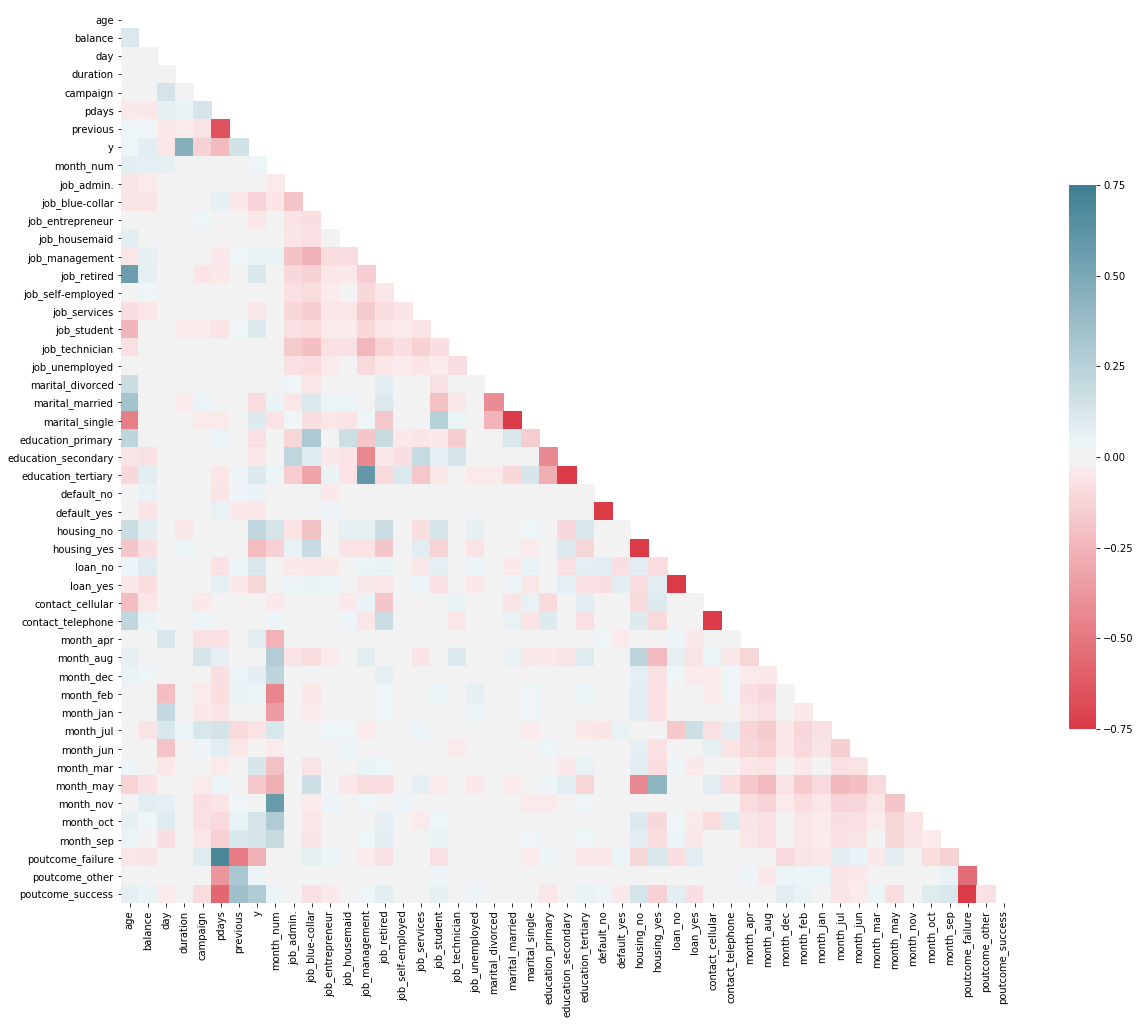

In [28]:
corr = train.corr()
f, ax = plt.subplots(figsize = (20,20))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.75, vmin=-0.75, square=True, cbar_kws={"shrink": 0.5})

In [22]:
#seperate features and response
train_class=train["y"]
train_features=train.loc[:, train.columns != 'y']
test_class=test["y"]
test_features=test.loc[:, test.columns != 'y']

Feature ranking:
1. feature 3 (0.270926)
2. feature 2 (0.083845)
3. feature 0 (0.077920)
4. feature 1 (0.068693)
5. feature 4 (0.052457)
6. feature 5 (0.035762)
7. feature 47 (0.029268)
8. feature 45 (0.028328)
9. feature 7 (0.018019)
10. feature 27 (0.017443)
11. feature 28 (0.016606)
12. feature 6 (0.014008)
13. feature 43 (0.012932)
14. feature 17 (0.012531)
15. feature 41 (0.012456)
16. feature 33 (0.012044)
17. feature 20 (0.011574)
18. feature 9 (0.011099)
19. feature 8 (0.011010)
20. feature 24 (0.010829)
21. feature 23 (0.010802)
22. feature 12 (0.010792)
23. feature 21 (0.010620)
24. feature 40 (0.010015)
25. feature 34 (0.009874)
26. feature 44 (0.008476)
27. feature 15 (0.008251)
28. feature 13 (0.008174)
29. feature 30 (0.007972)
30. feature 38 (0.007865)
31. feature 29 (0.007814)
32. feature 22 (0.007796)
33. feature 39 (0.007738)
34. feature 19 (0.007581)
35. feature 36 (0.007210)
36. feature 42 (0.006668)
37. feature 32 (0.006375)
38. feature 31 (0.006160)
39. feature 14

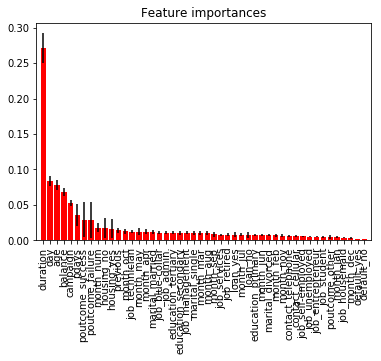

In [21]:
#feature importance (random forest based)
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)
forest.fit(train_features, train_class)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
#features_RF1 = []
#features_RF2 = []
print("Feature ranking:")
for f in range(train_features.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
#    if importances[indices[f]] > 0.01:
#        features_RF1.append(train_features.columns[indices[f]])
#    if importances[indices[f]] > 0.005:
#        features_RF2.append(train_features.columns[indices[f]])

#print("features_RF1 : ", features_RF1)
#print("features_RF2 : ", features_RF2)

plt.figure()
plt.title("Feature importances")
plt.bar(range(train_features.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_features.shape[1]), train_features.columns[indices], rotation=90)
plt.xlim([-1, train_features.shape[1]])
plt.show()

In [29]:
#feature selection via logistic regression
def stepwise_selection(train_features, train_class, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(train_features.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(train_class, sm.add_constant(pd.DataFrame(train_features[included+[new_column]]))).fit(random_state=40)
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(train_class, sm.add_constant(pd.DataFrame(train_features[included]))).fit(random_state=40)
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

features_logreg = stepwise_selection(train_features, train_class)

print('resulting features:')
print("features_logreg : ", features_logreg)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Add  duration                       with p-value 0.0
Add  poutcome_success               with p-value 0.0
Add  housing_yes                    with p-value 0.0
Add  housing_no                     with p-value 0.0
Add  pdays                          with p-value 1.27916e-248
Add  month_mar                      with p-value 2.90649e-202
Add  month_oct                      with p-value 1.47232e-209
Add  month_sep                      with p-value 3.68339e-164
Add  month_apr                      with p-value 9.4434e-181
Drop housing_yes                    with p-value 0.200969


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add  marital_single                 with p-value 2.90872e-80
Add  campaign                       with p-value 5.44668e-74
Add  loan_no                        with p-value 9.82295e-66
Add  month_feb                      with p-value 2.54305e-61
Add  month_dec                      with p-value 5.76609e-57
Add  job_blue-collar                with p-value 1.84573e-49
Add  job_student                    with p-value 2.82503e-31
Add  job_retired                    with p-value 1.33954e-29
Add  education_primary              with p-value 4.42493e-37
Add  education_tertiary             with p-value 1.28387e-25
Add  education_secondary            with p-value 1.25099e-23
Add  housing_yes                    with p-value 2.06187e-34
Add  month_jun                      with p-value 1.59549e-23
Add  job_admin.                     with p-value 3.71047e-18
Add  month_num                      with p-value 3.07681e-18
Add  job_entrepreneur               with p-value 3.70014e-09
Add  day                

In [23]:
#different versions of selected columns
features_RF2 = ['duration', 'day', 'age', 'balance', 'campaign', 'pdays',
       'poutcome_success', 'poutcome_failure', 'month_num', 'housing_no',
       'housing_yes', 'previous', 'month_may', 'month_oct', 'month_apr',
       'job_technician', 'marital_married', 'job_blue-collar', 'month_mar',
       'job_admin.', 'marital_single', 'education_tertiary', 'job_management',
       'education_secondary', 'month_aug', 'month_sep', 'loan_yes',
       'job_retired', 'job_services', 'education_primary', 'loan_no',
       'month_jul', 'marital_divorced', 'month_jun', 'month_feb', 'month_nov',
       'contact_telephone', 'contact_cellular', 'job_self-employed',
       'job_entrepreneur', 'job_unemployed', 'job_student']

features_RF1 = ['duration', 'day', 'age', 'balance', 'campaign', 'pdays',
       'poutcome_success', 'poutcome_failure', 'month_num', 'housing_no',
       'housing_yes', 'previous', 'month_may', 'month_oct', 'month_apr',
       'job_technician', 'marital_married', 'job_blue-collar', 'month_mar',
       'job_admin.', 'marital_single', 'education_tertiary', 'job_management',
       'education_secondary']

features_logreg = ['poutcome_success', 'housing_no', 'duration', 'pdays', 'month_mar',
       'month_oct', 'month_sep', 'month_apr', 'loan_no', 'campaign',
       'marital_single', 'job_blue-collar', 'month_feb', 'month_dec',
       'job_student', 'education_tertiary', 'job_retired', 'month_jun',
       'job_admin.', 'month_num', 'education_primary', 'job_entrepreneur',
       'balance', 'loan_yes', 'day', 'previous', 'job_housemaid', 'default_no',
       'poutcome_other']


train_features_RF24 = train_features[features_RF1]
test_features_RF24 = test_features[features_RF1]

train_features_RF41 = train_features[features_RF2]
test_features_RF41 = test_features[features_RF2]

train_features_logreg = train_features[features_logreg]
test_features_logreg = test_features[features_logreg]

#RF24 and logreg combinated selection
features_mutual = []
for fea in range(len(features_logreg)):
    for ffea in range(len(features_RF1)):
        if (features_logreg[fea] == features_RF1[ffea]) is True:
            features_mutual.append(features_logreg[fea])

train_features_mutual = train_features[features_mutual]
test_features_mutual = test_features[features_mutual]


train_selected_columns=[train_features_RF41,train_features_RF24,train_features_logreg,train_features_mutual]
test_selected_columns=[test_features_RF41,test_features_RF24,test_features_logreg,test_features_mutual]
dataset_names=["RF41","RF24","logreg","mutual"]

for i in range(4):
    print(train_selected_columns[i].columns, "\n")

Index(['duration', 'day', 'age', 'balance', 'campaign', 'pdays',
       'poutcome_success', 'poutcome_failure', 'month_num', 'housing_no',
       'housing_yes', 'previous', 'month_may', 'month_oct', 'month_apr',
       'job_technician', 'marital_married', 'job_blue-collar', 'month_mar',
       'job_admin.', 'marital_single', 'education_tertiary', 'job_management',
       'education_secondary', 'month_aug', 'month_sep', 'loan_yes',
       'job_retired', 'job_services', 'education_primary', 'loan_no',
       'month_jul', 'marital_divorced', 'month_jun', 'month_feb', 'month_nov',
       'contact_telephone', 'contact_cellular', 'job_self-employed',
       'job_entrepreneur', 'job_unemployed', 'job_student'],
      dtype='object') 

Index(['duration', 'day', 'age', 'balance', 'campaign', 'pdays',
       'poutcome_success', 'poutcome_failure', 'month_num', 'housing_no',
       'housing_yes', 'previous', 'month_may', 'month_oct', 'month_apr',
       'job_technician', 'marital_married', 'job_b

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   39.3s finished


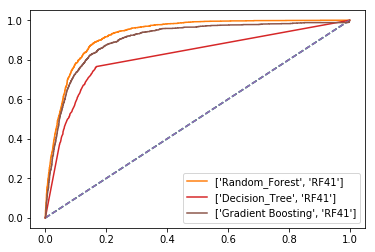

Optimization terminated successfully.
         Current function value: 0.422043
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.433379
         Iterations 9
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.8s finished


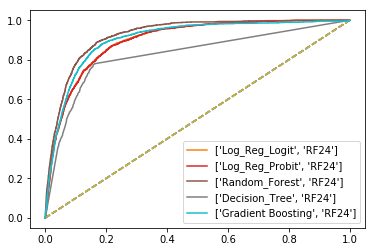

Optimization terminated successfully.
         Current function value: 0.406760
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.418932
         Iterations 9
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.6s finished


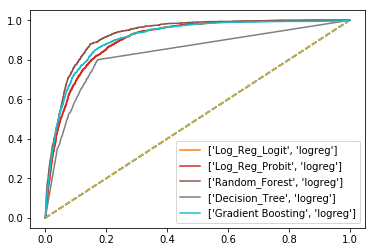

Optimization terminated successfully.
         Current function value: 0.441919
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.451786
         Iterations 9
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.8s finished


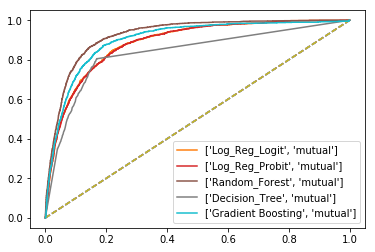

In [18]:
result_table=pd.DataFrame()

for i in range(0,4):
    random.seed(1)
    train_features=train_selected_columns[i]
    test_features=test_selected_columns[i]
    
    if i>=1:
        #logistic regression logit
        logit_model=sm.Logit(train_class,train_features)
        result=logit_model.fit( random_state=42)
        #print(result.summary2())
        test_pred1=result.predict(test_features)
        auc =roc_auc_score(test_class, test_pred1)
       # calculate roc curve
        fpr, tpr, thresholds = roc_curve(test_class, test_pred1)
        pyplot.plot([0, 1], [0, 1], linestyle='--')
        pyplot.plot(fpr, tpr,label=["Log_Reg_Logit",dataset_names[i]])
        test_pred1[test_pred1 > 0.5] = 1
        test_pred1[test_pred1 <= 0.5] = 0
        acc=accuracy_score(test_class, test_pred1)
        df2 = pd.DataFrame({"Method":["Logistic Regression Logit"], "Dataset":[dataset_names[i]],"AUC":[auc],"Accuracy":[acc]}) 
        result_table=result_table.append(df2, ignore_index = True) 



        #logistic regression probit
        probit_model=sm.Probit(train_class,train_features)
        result=probit_model.fit( random_state=42)
        #print(result.summary2())
        test_pred2=result.predict(test_features)
        auc =roc_auc_score(test_class, test_pred2)
        # calculate roc curve
        fpr, tpr, thresholds = roc_curve(test_class, test_pred2)
        pyplot.plot([0, 1], [0, 1], linestyle='--')
        pyplot.legend()
        pyplot.plot(fpr, tpr,label=["Log_Reg_Probit",dataset_names[i]])
        pyplot.legend()
        test_pred2[test_pred2 > 0.5] = 1
        test_pred2[test_pred2 <= 0.5] = 0
        acc=accuracy_score(test_class, test_pred2)
        df2 = pd.DataFrame({"Method":["Logistic Regression Probit"], "Dataset":[dataset_names[i]],"AUC":[auc],"Accuracy":[acc]}) 
        result_table=result_table.append(df2, ignore_index = True)

    
    
    

    #random forest
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 3)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 50, num = 3)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}
    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    rf = RandomForestClassifier(random_state=42)
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 1, cv = 5, verbose=2, random_state=42, n_jobs = -1,scoring="roc_auc")
    # Fit the random search model
    rf_random.fit(train_features, train_class)
    best_random = rf_random.best_estimator_
    test_pred=best_random.predict_proba(test_features)[:,1]
    auc =roc_auc_score(test_class, test_pred)
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(test_class, test_pred)
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    pyplot.plot(fpr, tpr,label=["Random_Forest",dataset_names[i]])
    test_pred[test_pred > 0.5] = 1
    test_pred[test_pred <= 0.5] = 0
    acc=accuracy_score(test_class, test_pred)
    df2 = pd.DataFrame({"Method":["Random Forest"], "Dataset":[dataset_names[i]],"AUC":[auc],"Accuracy":[acc]}) 
    result_table=result_table.append(df2, ignore_index = True)
    
    
    
        

    #decision tree
    tree_para = {'criterion':['gini','entropy'],'max_depth':[4,10,30],"min_samples_leaf":[10,20,30]}
    clf = GridSearchCV(DecisionTreeClassifier( random_state=42), tree_para, cv=5,scoring="roc_auc")
    clf.fit(train_features, train_class)
    best_parameters_dec_tree = clf.best_estimator_
    test_pred=best_parameters_dec_tree.predict_proba(test_features)[:,1]
    auc =roc_auc_score(test_class, test_pred)
    #calculate roc curve
    fpr, tpr, thresholds = roc_curve(test_class, test_pred)
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    pyplot.plot(fpr, tpr,label=["Decision_Tree",dataset_names[i]])
    test_pred[test_pred > 0.5] = 1
    test_pred[test_pred <= 0.5] = 0
    acc=accuracy_score(test_class, test_pred)
    acc=accuracy_score(test_class, test_pred)
    df2 = pd.DataFrame({"Method":["Decision_Tree"], "Dataset":[dataset_names[i]],"AUC":[auc],"Accuracy":[acc]}) 
    result_table=result_table.append(df2, ignore_index = True)
    
    
    #gradient boosting
    gb_para = {'learning_rate':[0.1,1]}
    clf = GridSearchCV(GradientBoostingClassifier( random_state=42), gb_para, cv=5,scoring="roc_auc")
    clf.fit(train_features, train_class)
    best_parameters_gb = clf.best_estimator_
    test_pred=best_parameters_gb.predict_proba(test_features)[:,1]
    auc =roc_auc_score(test_class, test_pred)
    #calculate roc curve
    fpr, tpr, thresholds = roc_curve(test_class, test_pred)
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    pyplot.plot(fpr, tpr,label=["Gradient Boosting",dataset_names[i]])
    test_pred[test_pred > 0.5] = 1
    test_pred[test_pred <= 0.5] = 0
    acc=accuracy_score(test_class, test_pred)
    df2 = pd.DataFrame({"Method":["Gradient Boosting"], "Dataset":[dataset_names[i]],"AUC":[auc],"Accuracy":[acc]}) 
    result_table=result_table.append(df2, ignore_index = True)

    
    pyplot.legend()
    pyplot.show()

"""
export_csv = result_table.to_csv ('resulttable.csv', index = None, header=True)
"""
#codeline above is used only once since we fix the result for demo.

In [3]:
result_table=pd.read_csv("resulttable.csv",sep=",")

In [4]:
result_table.sort_values(by=["AUC"],ascending=False)
#best method is Random Forest with RF41 dataset

,Method,Dataset,AUC,Accuracy
0,Random Forest,RF41,0.926906,0.839840
10,Random Forest,logreg,0.926651,0.840381
5,Random Forest,RF24,0.925120,0.838050
15,Random Forest,mutual,0.924275,0.837801
12,Gradient Boosting,logreg,0.909852,0.834804
7,Gradient Boosting,RF24,0.905878,0.835928
8,Logistic Regression Logit,logreg,0.904151,0.824399
9,Logistic Regression Probit,logreg,0.903787,0.821319
17,Gradient Boosting,mutual,0.901340,0.827395
2,Gradient Boosting,RF41,0.900574,0.833847


Random Grid is {'n_estimators': [200, 350, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 30, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   40.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


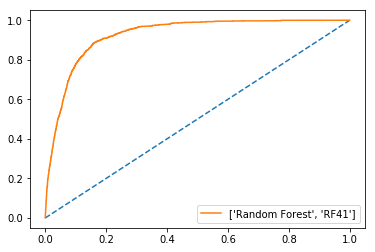

Accuracy is 0.8397569299925081


In [25]:
#Parameters of the best model (replication of the first training with the same seed)
train_features=train_selected_columns[0]
test_features=test_selected_columns[0]

#random forest
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print("Random Grid is",random_grid)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier( random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
random.seed(1)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 1, cv = 5, verbose=2, random_state=42, n_jobs = -1,scoring="roc_auc")
# Fit the random search model
random.seed(1)
rf_random.fit(train_features, train_class)
print(rf_random.best_estimator_)
best_random = rf_random.best_estimator_
test_pred=best_random.predict_proba(test_features)[:,1]
auc =roc_auc_score(test_class, test_pred)
fpr, tpr, thresholds = roc_curve(test_class, test_pred)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr,label=["Random Forest","RF41"])
pyplot.legend()
pyplot.show()
test_pred[test_pred > 0.5] = 1
test_pred[test_pred <= 0.5] = 0
acc=accuracy_score(test_class, test_pred)
print("Accuracy is",acc)



precision : [0.80379606 0.88537437]
recall    : [0.89894281 0.78057105]
fscore    : [0.8487111  0.82967616]
support   : [12013 12013]


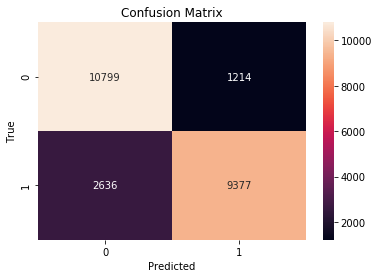

In [26]:
cm = confusion_matrix(test_class, test_pred)

precision, recall, fscore, support = score(test_class, test_pred)

print('precision : {}'.format(precision))
print('recall    : {}'.format(recall))
print('fscore    : {}'.format(fscore))
print('support   : {}'.format(support))

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g'); 

# labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('True'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);
plt.show()